<b>BANK MARKETING

<b>PART 1. DATA WRANGLING

In [39]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
# load the data file
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [41]:
# explore the data
df.shape

(41188, 21)

There are 21 columns and 41188 rows in the data. The 'y' column will be the target variable. The other columns will be the predictors. 

In [42]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

There is no non-null values in each column. However, when we look at some sample data, we see unknown values. Unknown values are also missing values. We will try to find these values in the following steps. 

In [44]:
#summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The above columns 'age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed' are numerical columns. When we summarize their statistics, we can make comments for each numerical columns. 

<b>age</b> : Its minumum value is 17 and maximum values is 98. Its mean is 40 and median is 38. We can say that it looks like normal distribution.

<b>duration</b> : Its standart deviation is 259.27. We can say that it is very spread data. Its maximum value is 4918 while its mean is 258.25. It would have some greater value outliers.

<b>campaign</b> : While its mean is 2.56 and median is 2, its maximum value is 56. There would be outliers.

<b>pdays</b> : There is something strange in this column. Most of the values in this column is 999. Only a few rows have different values. We should make a deep analyze for this column in the future. 

<b>previous</b>: This column is also very strange. Most of the values equal to zero. Only a few of values are greater than zero. 
We will analyze this column deeply in the future.

<b>emp.var.rate</b> : This variable has negative and positive values. The number of negative values are higher that positive values.

<b>cons.price.idx</b> : The standart deviation of this variable is low. It means that the values spread in a limited area. 

<b>cons.conf.idx</b> : The standart deviation of this variable is low. It means that the values spread in a limited area. Also, it includes only negative values.

<b>euribor3m</b> : The mean of this variable is 3.62. The median is 4.85. The values look like normal. 

<b>nr.employed</b> : The feature looks normal. The values spread between 4963 and 5228.

In [45]:
# find percentage of 'unknown' values for each column.
print("Number of missing values in each column:")
for i in range(df.shape[1]):
    a = df.iloc[:,i][df.iloc[:,i] == 'unknown'].shape[0]
    print(df.columns.get_values()[i], ":", round(a/df.shape[0]*100, 2), "%")

Number of missing values in each column:
age : 0.0 %
job : 0.8 %
marital : 0.19 %
education : 4.2 %
default : 20.87 %
housing : 2.4 %
loan : 2.4 %
contact : 0.0 %
month : 0.0 %
day_of_week : 0.0 %
duration : 0.0 %
campaign : 0.0 %
pdays : 0.0 %
previous : 0.0 %
poutcome : 0.0 %
emp.var.rate : 0.0 %
cons.price.idx : 0.0 %
cons.conf.idx : 0.0 %
euribor3m : 0.0 %
nr.employed : 0.0 %
y : 0.0 %


When we found the percentage of having unknown values of each column, the default column has the most unknown values. %20.87 of the default values are unknown. This rate is very high to drop all missing values. We will analyze this variable in the future and we will decide whether dropping this column or not.


In [52]:
# rename column names including dot.
df.rename(columns= {'emp.var.rate' : 'empvarrate','cons.price.idx' : 'conspriceidx','cons.conf.idx': 'consconfidx', 'nr.employed':'nremployed','y':'subscribed'}, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
 # describe categorical and numeric columns. 
numeric_columns= ['age','duration','campaign','pdays','previous','empvarrate','conspriceidx','consconfidx','euribor3m','nremployed']
categoric_columns = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
print('numerical columns:', numeric_columns)
print('categorical columns:', categoric_columns)

numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m', 'nremployed']
categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


We changed the name of 'y' column to 'subscribed' because it will be more clear to understand the meaning of this variable in the visualization part. 

<b> PART 2. EXPLORATORY DATA ANALYSIS

<b> Target Variable:

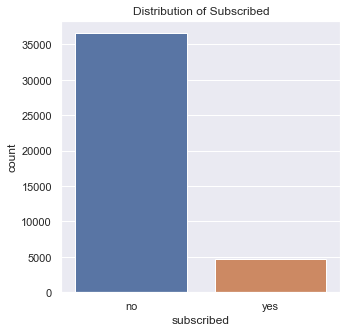

In [77]:
# explore the target variable.
plt.figure(figsize=(5,5))
sns.countplot(x= 'subscribed', data=df)
plt.title('Distribution of Subscribed')
plt.show()

In [78]:
print('Percentage of Values of Target Variable:')
df.subscribed.value_counts(normalize=True)

Percentage of Values of Target Variable:


no     0.887346
yes    0.112654
Name: subscribed, dtype: float64

%88.73 of the target variable, subscribed, include 'no' values. Only %11.27 of the variable is 'yes'. This variable looks like imbalance. We can resample the variable to make the data balance. We will decide it later. 

<b> Numerical Variables:

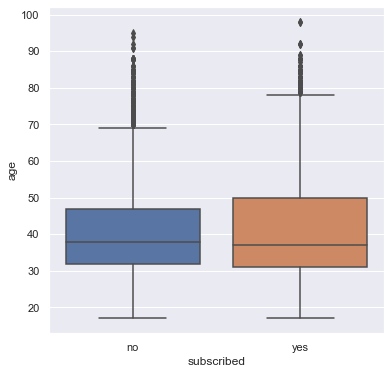

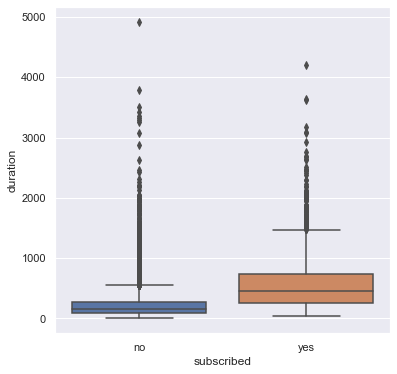

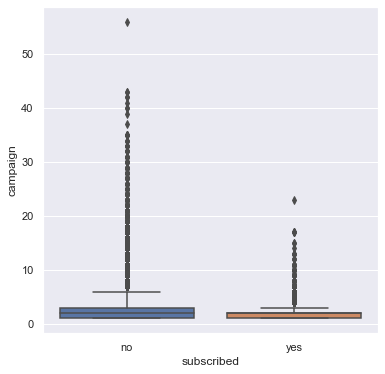

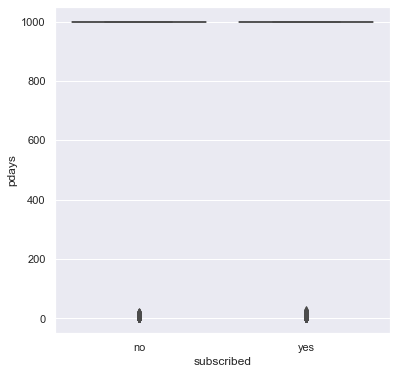

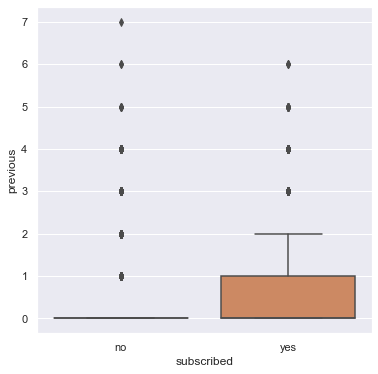

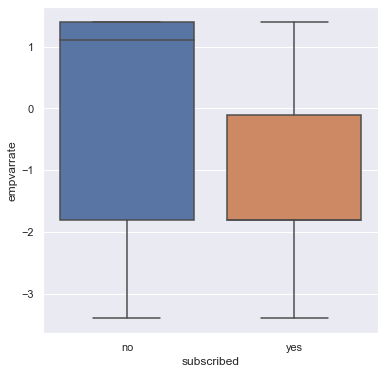

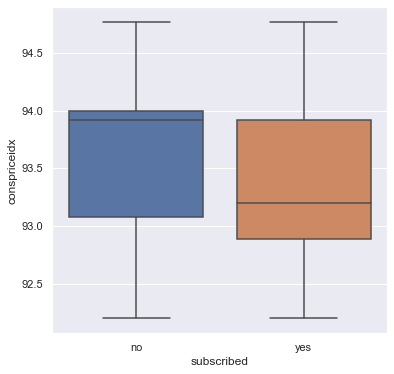

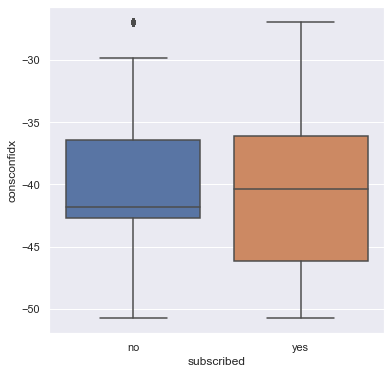

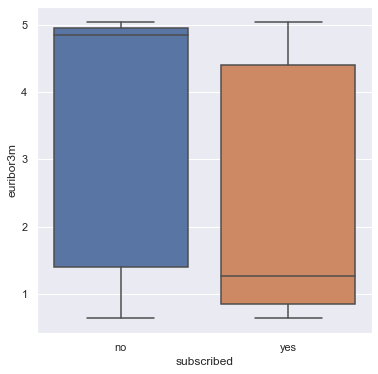

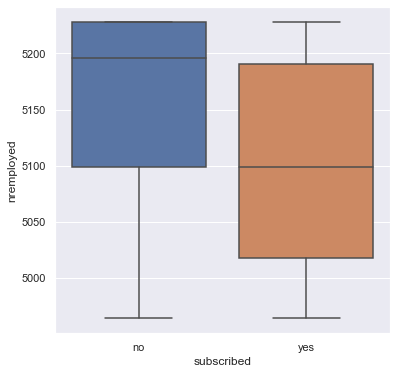

In [57]:
# explore the outliers using boxplots.
sns.set()
for column in numeric_columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(x= 'subscribed', y= column, data = df)
    plt.show()

The variables, age, duration, campaign, pdays and previous,have outliers. The outliers will be deleted after analyzing the importances of variables and deleting the unneccesary columns.

In [58]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [59]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

The boxplots of previous and pdays columns look very strange so we looked into their values in detailed. 
Most of the pdays column includes the value 999. This is impossible so we can say that the value 999 is also missing value. This column will be deleted in the next steps.
The previous column looks normal. Only most of the column values are zero. However, the other values close each other.    

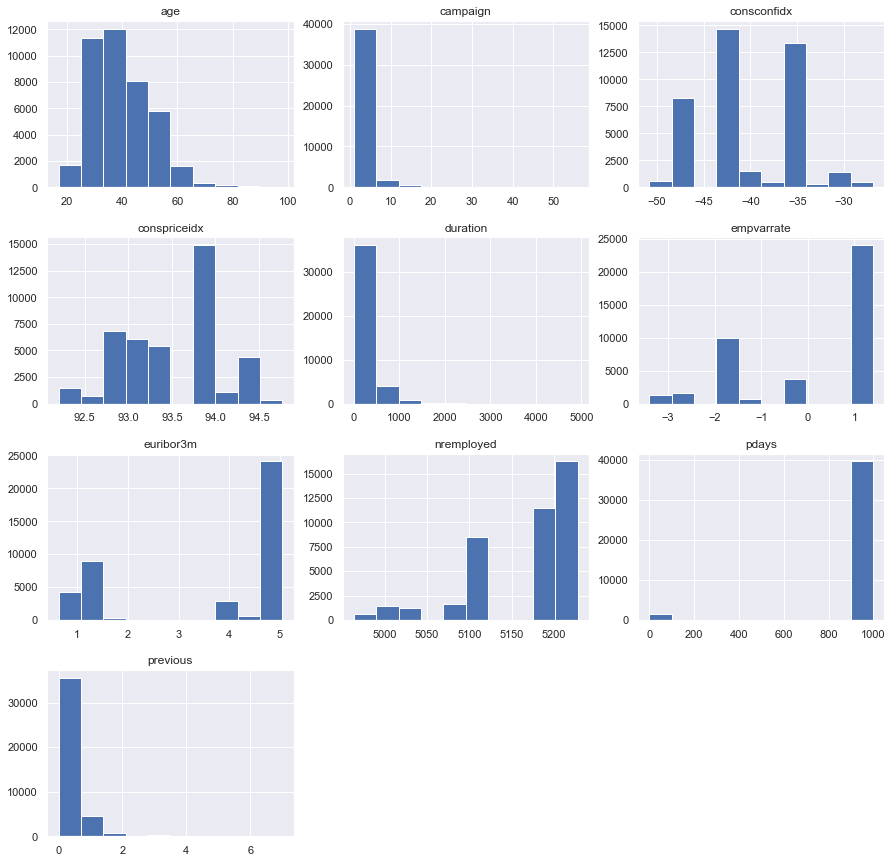

In [60]:
# explore the distribution of each numeric columns.
df.hist(column=numeric_columns,figsize=(15,15))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

Text(0.5, 1, 'CORRELATION MATRIX')

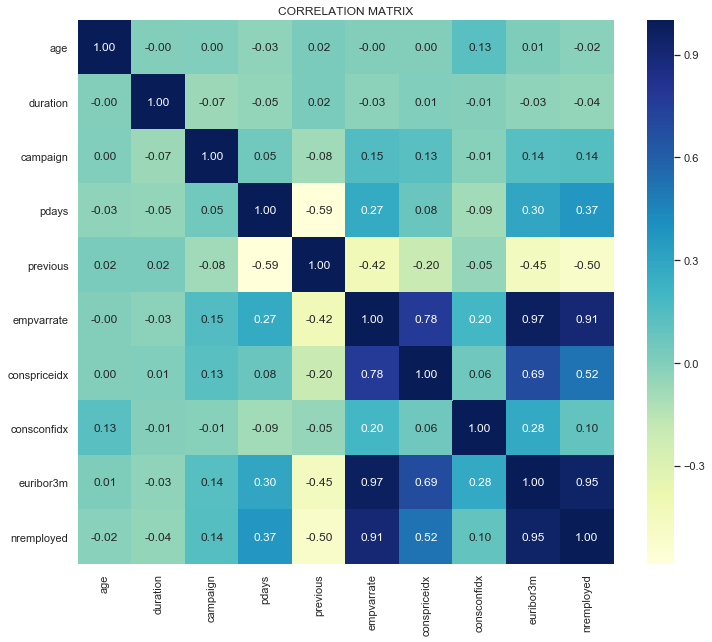

In [61]:
# visualize the correlation between numeric variables.
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "YlGnBu" )
plt.title('CORRELATION MATRIX')

When we see the correlation between numeric variables, nremployed, empvarrate and euribor3m, are high correlated with each other. Therefore, their scatter plot built to see the data points and their regression lines.

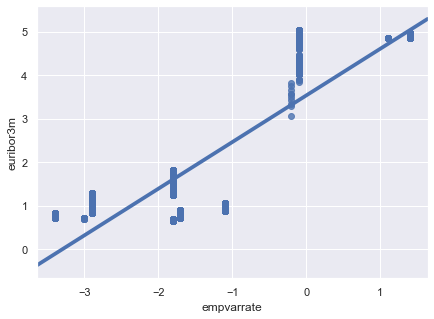

In [63]:
plt.figure(figsize = (7,5))
sns.regplot(x= 'empvarrate', y = 'euribor3m', data=df)

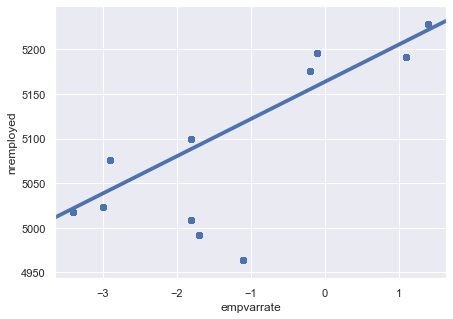

In [64]:
plt.figure(figsize = (7,5))
sns.regplot(x= 'empvarrate', y = 'nremployed', data=df)

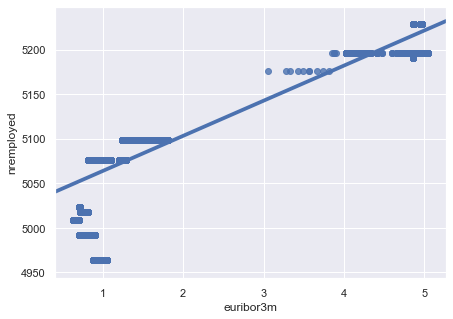

In [65]:
plt.figure(figsize = (7,5))
sns.regplot(x= 'euribor3m', y = 'nremployed', data=df)

<b> Categorical Variables:

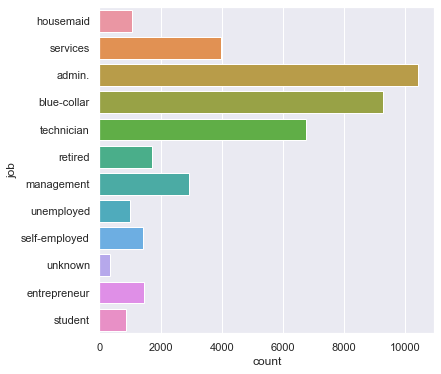

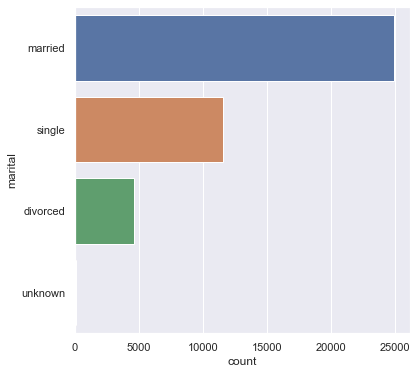

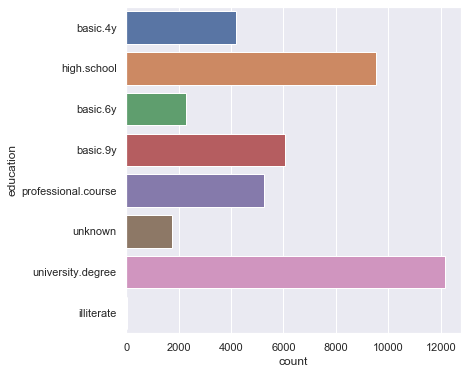

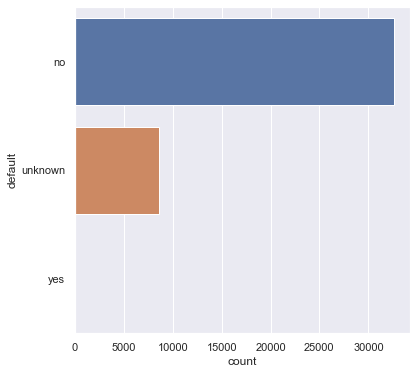

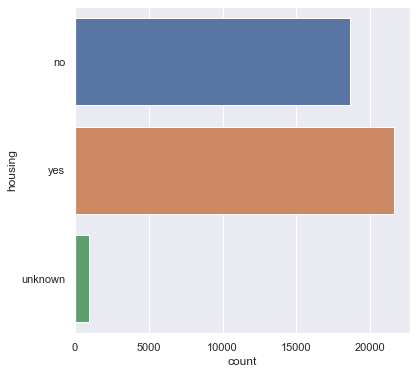

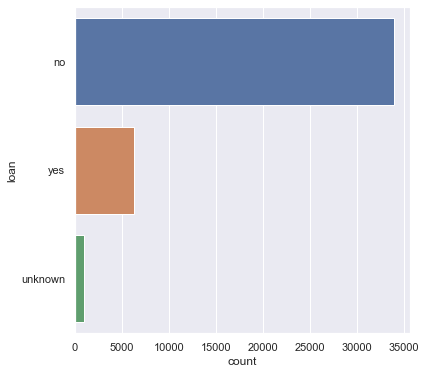

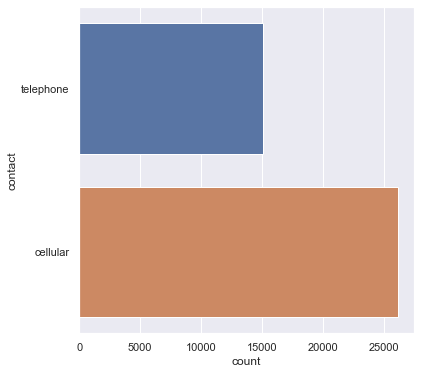

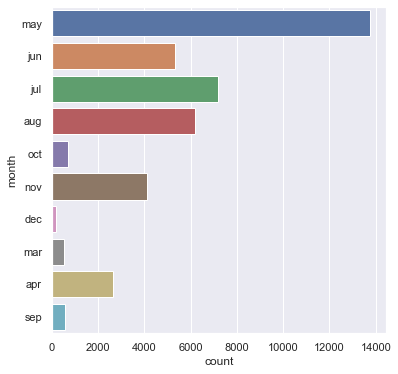

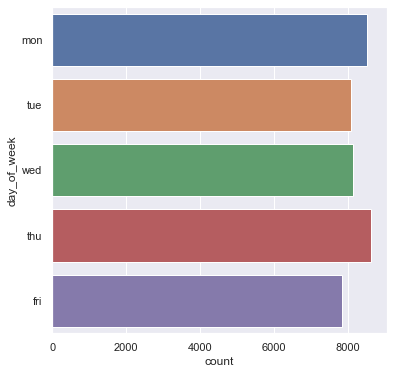

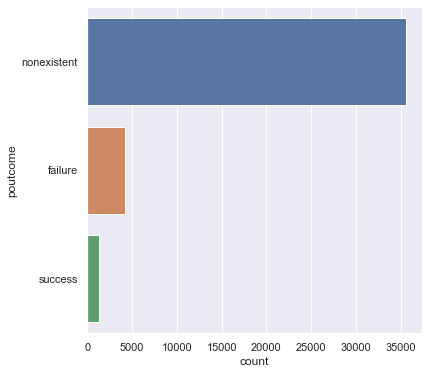

In [66]:

for column in categoric_columns:
    plt.figure(figsize=(6,6))
    sns.countplot(y=column, data=df)
    plt.show()

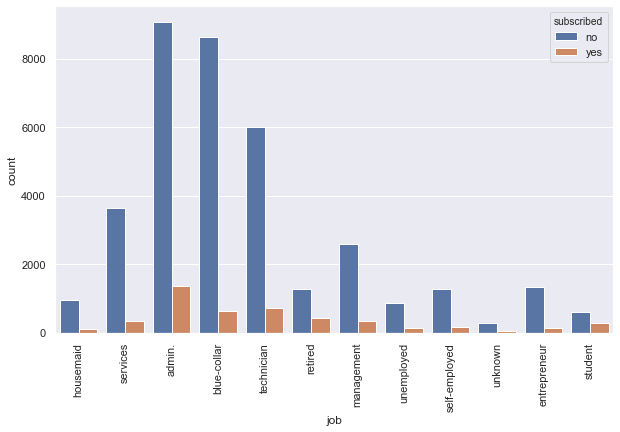

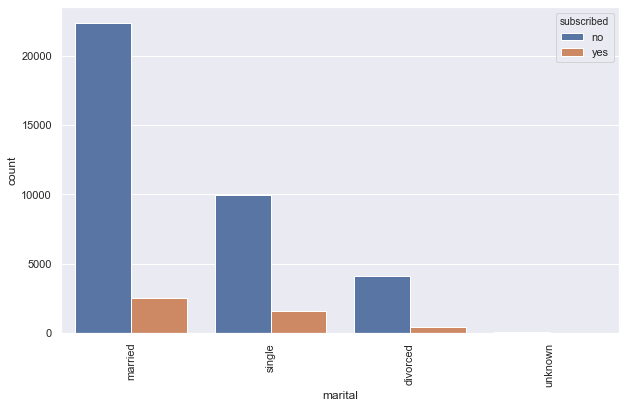

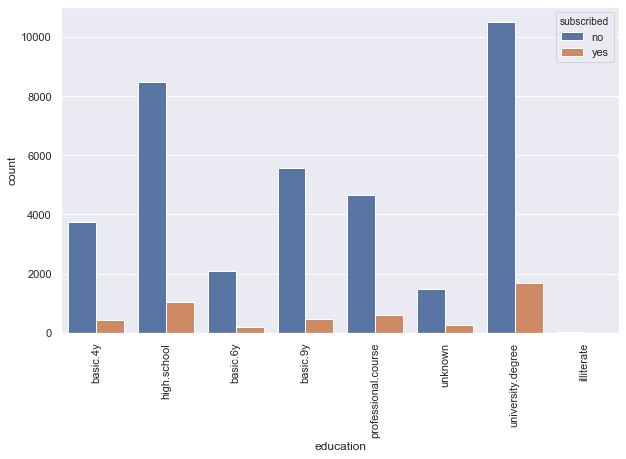

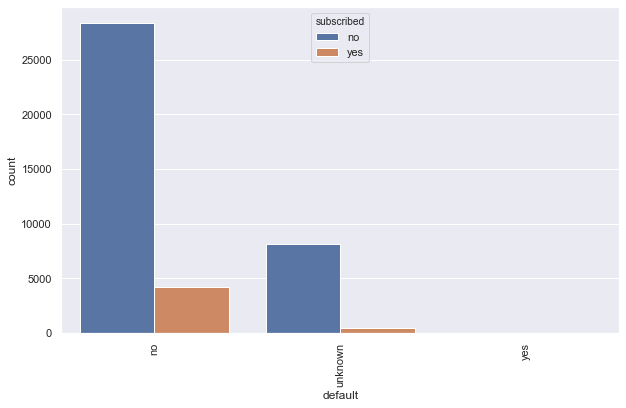

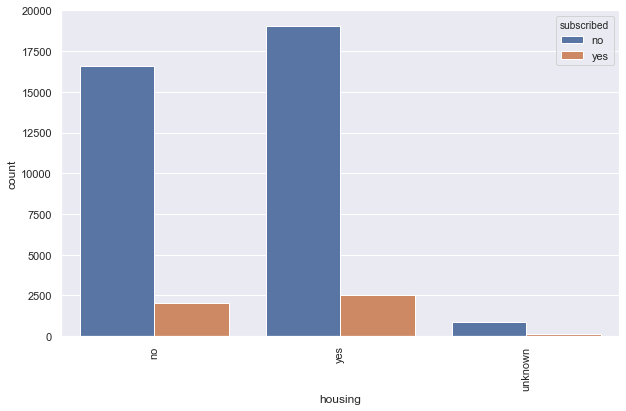

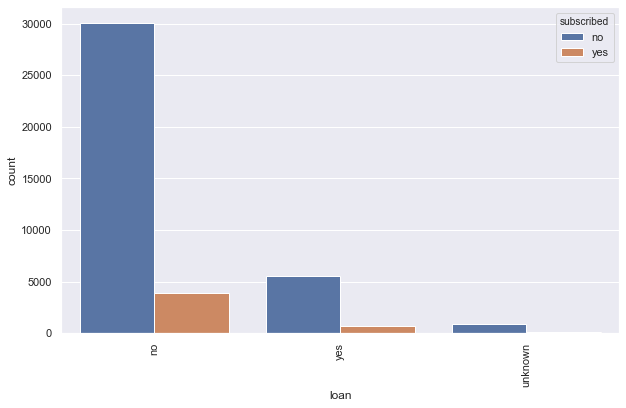

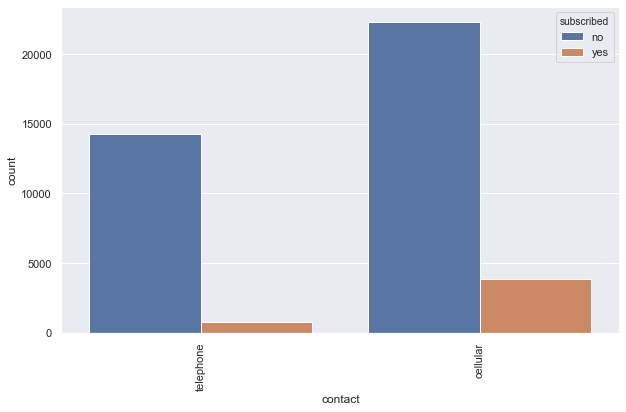

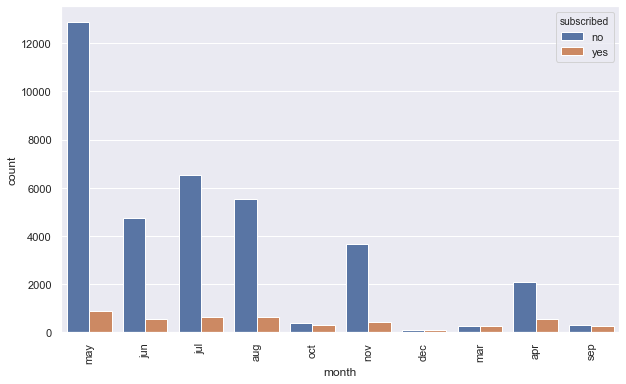

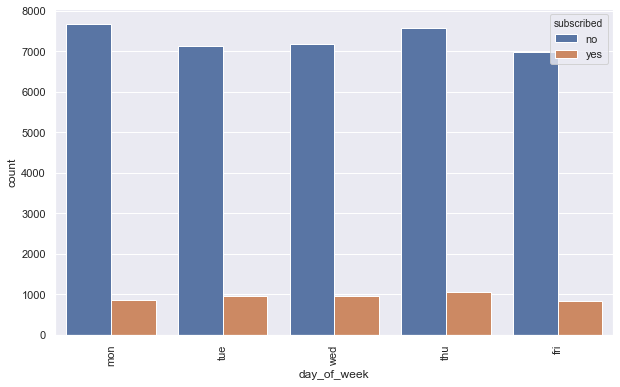

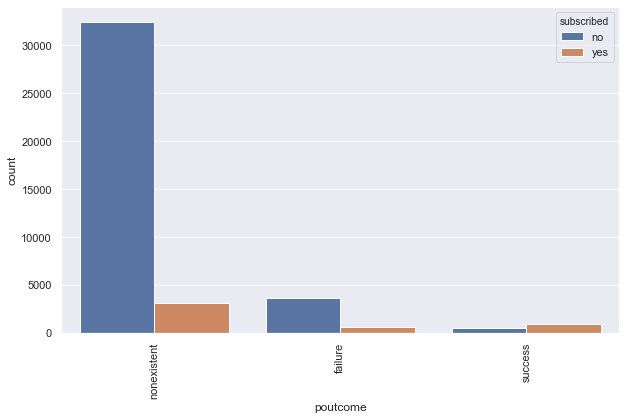

In [67]:
# explore the distribution of each categorical variables in terms of target variable.
for column in categoric_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=column, hue='subscribed', data=df)
    plt.xticks(rotation='vertical')
    plt.show()

<b> PART 3. STATISTICAL ANALYSIS OF VARIABLES

In [68]:
# age
age_yes = df[df.subscribed == 'yes']
age_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(age_yes.age, age_no.age)
print('age :', t_test)

age : Ttest_indResult(statistic=6.172087109640128, pvalue=6.80213641846347e-10)


In [69]:
# duration
duration_yes = df[df.subscribed == 'yes']
duration_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(duration_yes.duration, duration_no.duration)
print('duration :', t_test)

duration : Ttest_indResult(statistic=89.9672253349018, pvalue=0.0)


In [71]:
# campaign
campaign_yes = df[df.subscribed == 'yes']
campaign_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(campaign_yes.campaign, campaign_no.campaign)
print('campaign :', t_test)

campaign : Ttest_indResult(statistic=-13.496542997299592, pvalue=2.0077799906175704e-41)


In [72]:
# pdays
pdays_yes = df[df.subscribed == 'yes']
pdays_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(pdays_yes.age, pdays_no.age)
print('pdays :', t_test)

pdays : Ttest_indResult(statistic=6.172087109640128, pvalue=6.80213641846347e-10)


In [73]:
# previous
previous_yes = df[df.subscribed == 'yes']
previous_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(previous_yes.previous, previous_no.previous)
print('age :', t_test)

age : Ttest_indResult(statistic=48.00267792469279, pvalue=0.0)


In [75]:
# emp.var.rate
empvarrate_yes = df[df.subscribed == 'yes']
empvarrate_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(empvarrate_yes.empvarrate, empvarrate_no.empvarrate)
print('emp.var.rate :', t_test)

emp.var.rate : Ttest_indResult(statistic=-63.433665552940745, pvalue=0.0)


In [81]:
# conspriceidx
conspriceidx_yes = df[df.subscribed == 'yes']
conspriceidx_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(conspriceidx_yes.conspriceidx, conspriceidx_no.conspriceidx)
print('conspriceidx :', t_test)

conspriceidx : Ttest_indResult(statistic=-27.90322177968841, pvalue=9.318964779954352e-170)


In [83]:
# consconfidx
consconfidx_yes = df[df.subscribed == 'yes']
consconfidx_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(consconfidx_yes.consconfidx, consconfidx_no.consconfidx)
print('consconfidx :', t_test)

consconfidx : Ttest_indResult(statistic=11.153921944215295, pvalue=7.536664996589982e-29)


In [86]:
# euribor3m
euribor3m_yes = df[df.subscribed == 'yes']
euribor3m_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(euribor3m_yes.euribor3m, euribor3m_no.euribor3m)
print('consconfidx :', t_test)

consconfidx : Ttest_indResult(statistic=-65.64662251866282, pvalue=0.0)


In [89]:
# nremployed
nremployed_yes = df[df.subscribed == 'yes']
nremployed_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(nremployed_yes.nremployed, nremployed_no.nremployed)
print('nremployed :', t_test)

nremployed : Ttest_indResult(statistic=-76.98448315100894, pvalue=0.0)


In [84]:
# job
job_crosstab = pd.crosstab(df.job, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = job_crosstab)
print('job p value:', p)
print(pd.crosstab(df.job, df.subscribed, normalize= 'index'))

job p value: 4.189763287563623e-199
subscribed           no       yes
job                              
admin.         0.870274  0.129726
blue-collar    0.931057  0.068943
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747674  0.252326
self-employed  0.895144  0.104856
services       0.918619  0.081381
student        0.685714  0.314286
technician     0.891740  0.108260
unemployed     0.857988  0.142012
unknown        0.887879  0.112121


In [90]:
# marital
marital_crosstab = pd.crosstab(df.marital, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = marital_crosstab)
print('marital p value:', p)
print(pd.crosstab(df.marital, df.subscribed, normalize= 'index'))

marital p value: 2.068014648442211e-26
subscribed        no       yes
marital                       
divorced    0.896791  0.103209
married     0.898427  0.101573
single      0.859959  0.140041
unknown     0.850000  0.150000


In [91]:
# education
education_crosstab = pd.crosstab(df.education, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = education_crosstab)
print('marital p value:', p)
print(pd.crosstab(df.education, df.subscribed, normalize= 'index'))

marital p value: 3.3051890144025054e-38
subscribed                 no       yes
education                              
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246
high.school          0.891645  0.108355
illiterate           0.777778  0.222222
professional.course  0.886515  0.113485
university.degree    0.862755  0.137245
unknown              0.854997  0.145003


In [92]:
# default
default_crosstab = pd.crosstab(df.default, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = default_crosstab)
print('default p value:', p)
print(pd.crosstab(df.default, df.subscribed, normalize= 'index'))

default p value: 5.1619579513916376e-89
subscribed       no      yes
default                     
no          0.87121  0.12879
unknown     0.94847  0.05153
yes         1.00000  0.00000


In [93]:
# housing
housing_crosstab = pd.crosstab(df.housing, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = housing_crosstab)
print('housing p value:', p)
print(pd.crosstab(df.housing, df.subscribed, normalize= 'index'))

housing p value: 0.05829447669453452
subscribed        no       yes
housing                       
no          0.891204  0.108796
unknown     0.891919  0.108081
yes         0.883806  0.116194


In [94]:
# loan
loan_crosstab = pd.crosstab(df.loan, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = loan_crosstab)
print('loan p value:', p)
print(pd.crosstab(df.loan, df.subscribed, normalize= 'index'))

loan p value: 0.5786752870441754
subscribed        no       yes
loan                          
no          0.886598  0.113402
unknown     0.891919  0.108081
yes         0.890685  0.109315


In [95]:
# contact
contact_crosstab = pd.crosstab(df.contact, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = contact_crosstab)
print('loan p value:', p)
print(pd.crosstab(df.contact, df.subscribed, normalize= 'index'))

loan p value: 1.5259856523129964e-189
subscribed        no       yes
contact                       
cellular    0.852624  0.147376
telephone   0.947687  0.052313


In [98]:
# month
month_crosstab = pd.crosstab(df.month, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = month_crosstab)
print('month p value:', p)
print(pd.crosstab(df.month, df.subscribed, normalize= 'index'))

month p value: 0.0
subscribed        no       yes
month                         
apr         0.795213  0.204787
aug         0.893979  0.106021
dec         0.510989  0.489011
jul         0.909534  0.090466
jun         0.894885  0.105115
mar         0.494505  0.505495
may         0.935653  0.064347
nov         0.898561  0.101439
oct         0.561281  0.438719
sep         0.550877  0.449123


In [105]:
# day_of_week
day_of_week_crosstab = pd.crosstab(df.day_of_week, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = day_of_week_crosstab)
print('day_of_week p value:', p)
print(pd.crosstab(df.day_of_week, df.subscribed, normalize= 'index'))

day_of_week p value: 2.9584820052785324e-05
subscribed         no       yes
day_of_week                    
fri          0.891913  0.108087
mon          0.900517  0.099483
thu          0.878812  0.121188
tue          0.882200  0.117800
wed          0.883329  0.116671


In [107]:
# poutcome
poutcome_crosstab = pd.crosstab(df.poutcome, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = poutcome_crosstab)
print('poutcome p value:', p)
print(pd.crosstab(df.poutcome, df.subscribed, normalize= 'index'))

poutcome p value: 0.0
subscribed         no       yes
poutcome                       
failure      0.857714  0.142286
nonexistent  0.911678  0.088322
success      0.348871  0.651129


In [ ]:
# drop missing values
# df = df[df != 'unknown']
# df = df.dropna()
# df.shape

In [ ]:
# find and drop outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape